In [2]:
import pybaseball as pb

In [3]:
import seaborn as sns
%matplotlib inline

In [4]:
import numpy as np

In [5]:
import pandas as pd

In [6]:
pb.cache.enable()

In [7]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### utils

In [8]:
def numeric_cols(df):
    return df.select_dtypes(include=np.number)

### player lookup

In [9]:
pb.playerid_lookup("Ohtani", "Shohei")

,name_last,name_first,key_mlbam,key_retro,key_bbref,key_fangraphs,mlb_played_first,mlb_played_last
0,ohtani,shohei,660271,ohtas001,ohtansh01,19755,2018.0,2022.0


In [10]:
pb.playerid_lookup("Riley", "Austin")

,name_last,name_first,key_mlbam,key_retro,key_bbref,key_fangraphs,mlb_played_first,mlb_played_last
0,riley,austin,663586,rilea001,rileyau01,18360,2019.0,2022.0


### check PA dist, complete season

In [11]:
batting2021_all = pb.batting_stats(2021, 2021, league="all", ind=1, qual=1)

In [13]:
batting2021_all["PA"].describe()

count    1049.000000
mean      173.324118
std       208.290850
min         1.000000
25%         5.000000
50%        62.000000
75%       298.000000
max       724.000000
Name: PA, dtype: float64

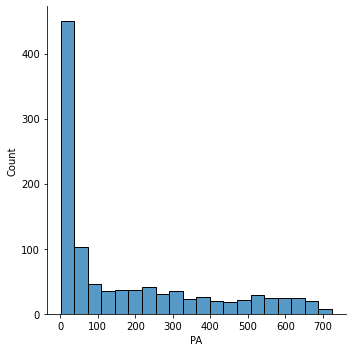

In [14]:
sns.displot(batting2021_all["PA"], bins=20)

### PA >= 100, complete season

In [ ]:
batting2021 = pb.batting_stats(2021, 2021, league="all", ind=1, qual=100)

In [ ]:
batting2021["PA"].describe()

In [ ]:
sns.displot(batting2021["PA"], bins=20)

### check PA dist, current (partial) season

In [15]:
batting2022 = pb.batting_stats(2022, 2022, league="all", ind=1, qual=1)

In [16]:
batting2022.shape

(634, 319)

In [17]:
batting2022["PA"].median()

177.5

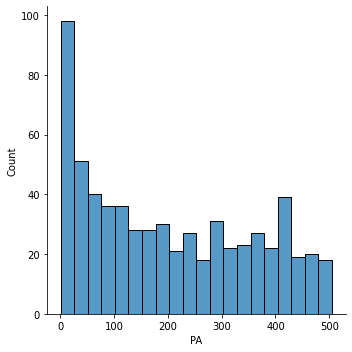

In [18]:
sns.displot(batting2022["PA"], bins=20)

In [19]:
batting2022.head(10)

,IDfg,Season,Name,Team,Age,G,AB,PA,H,1B,2B,3B,HR,R,RBI,BB,IBB,SO,HBP,SF,SH,GDP,SB,CS,AVG,GB,FB,LD,IFFB,Pitches,Balls,Strikes,IFH,BU,BUH,BB%,K%,BB/K,OBP,SLG,OPS,ISO,BABIP,GB/FB,LD%,GB%,FB%,IFFB%,HR/FB,IFH%,BUH%,wOBA,wRAA,wRC,Bat,Fld,Rep,Pos,RAR,WAR,Dol,Spd,wRC+,WPA,-WPA,+WPA,RE24,REW,pLI,phLI,PH,WPA/LI,Clutch,FB% (Pitch),FBv,SL%,SLv,CT%,CTv,CB%,CBv,CH%,CHv,SF%,SFv,KN%,KNv,XX%,PO%,wFB,wSL,wCT,wCB,wCH,wSF,wKN,wFB/C,wSL/C,wCT/C,wCB/C,wCH/C,wSF/C,wKN/C,O-Swing%,Z-Swing%,Swing%,O-Contact%,Z-Contact%,Contact%,Zone%,F-Strike%,SwStr%,BsR,FA% (sc),FT% (sc),FC% (sc),FS% (sc),FO% (sc),SI% (sc),SL% (sc),CU% (sc),KC% (sc),EP% (sc),CH% (sc),SC% (sc),KN% (sc),UN% (sc),vFA (sc),vFT (sc),vFC (sc),vFS (sc),vFO (sc),vSI (sc),vSL (sc),vCU (sc),vKC (sc),vEP (sc),vCH (sc),vSC (sc),vKN (sc),FA-X (sc),FT-X (sc),FC-X (sc),FS-X (sc),FO-X (sc),SI-X (sc),SL-X (sc),CU-X (sc),KC-X (sc),EP-X (sc),CH-X (sc),SC-X (sc),KN-X (sc),FA-Z (sc),FT-Z (sc),FC-Z (sc),FS-Z (sc),FO-Z (sc),SI-Z (sc),SL-Z (sc),CU-Z (sc),KC-Z (sc),EP-Z (sc),CH-Z (sc),SC-Z (sc),KN-Z (sc),wFA (sc),wFT (sc),wFC (sc),wFS (sc),wFO (sc),wSI (sc),wSL (sc),wCU (sc),wKC (sc),wEP (sc),wCH (sc),wSC (sc),wKN (sc),wFA/C (sc),wFT/C (sc),wFC/C (sc),wFS/C (sc),wFO/C (sc),wSI/C (sc),wSL/C (sc),wCU/C (sc),wKC/C (sc),wEP/C (sc),wCH/C (sc),wSC/C (sc),wKN/C (sc),O-Swing% (sc),Z-Swing% (sc),Swing% (sc),O-Contact% (sc),Z-Contact% (sc),Contact% (sc),Zone% (sc),Pace,Def,wSB,UBR,Age Rng,Off,Lg,wGDP,Pull%,Cent%,Oppo%,Soft%,Med%,Hard%,TTO%,CH% (pi),CS% (pi),CU% (pi),FA% (pi),FC% (pi),FS% (pi),KN% (pi),SB% (pi),SI% (pi),SL% (pi),XX% (pi),vCH (pi),vCS (pi),vCU (pi),vFA (pi),vFC (pi),vFS (pi),vKN (pi),vSB (pi),vSI (pi),vSL (pi),vXX (pi),CH-X (pi),CS-X (pi),CU-X (pi),FA-X (pi),FC-X (pi),FS-X (pi),KN-X (pi),SB-X (pi),SI-X (pi),SL-X (pi),XX-X (pi),CH-Z (pi),CS-Z (pi),CU-Z (pi),FA-Z (pi),FC-Z (pi),FS-Z (pi),KN-Z (pi),SB-Z (pi),SI-Z (pi),SL-Z (pi),XX-Z (pi),wCH (pi),wCS (pi),wCU (pi),wFA (pi),wFC (pi),wFS (pi),wKN (pi),wSB (pi),wSI (pi),wSL (pi),wXX (pi),wCH/C (pi),wCS/C (pi),wCU/C (pi),wFA/C (pi),wFC/C (pi),wFS/C (pi),wKN/C (pi),wSB/C (pi),wSI/C (pi),wSL/C (pi),wXX/C (pi),O-Swing% (pi),Z-Swing% (pi),Swing% (pi),O-Contact% (pi),Z-Contact% (pi),Contact% (pi),Zone% (pi),Pace (pi),FRM,AVG+,BB%+,K%+,OBP+,SLG+,ISO+,BABIP+,LD+%,GB%+,FB%+,HR/FB%+,Pull%+,Cent%+,Oppo%+,Soft%+,Med%+,Hard%+,EV,LA,Barrels,Barrel%,maxEV,HardHit,HardHit%,Events,CStr%,CSW%,xBA,xSLG,xwOBA
8,15640,2022,Aaron Judge,NYY,30,110,412,488,125,60,19,0,46,96,100,66,8,122,4,4,0,12,12,1,0.303,116,130,48,4,2042,804,1238,7,0,0,0.135,0.250,0.54,0.401,0.684,1.086,0.381,0.319,0.0089,0.163,0.395,0.442,0.031,0.354,0.060,0.0,0.450,54.1,110,55.7,3.3,14.6,-2.9,72.3,7.5,$60.4,4.5,201,5.22,-7.99,13.21,61.08,6.55,1.08,2.54,4,6.01,-1.18,0.433,93.9,0.260,84.6,0.067,88.1,0.078,80.3,0.124,85.0,0.038,88.3,NaN,NaN,0.012,NaN,31.9,14.7,0.8,3.7,1.2,-0.8,NaN,3.61,2.78,0.57,2.31,0.48,-1.05,NaN,0.271,0.669,0.427,0.545,0.858,0.737,0.392,0.598,0.112,0.7,0.283,NaN,0.061,0.026,NaN,0.147,0.264,0.067,0.014,0.001,0.136,NaN,NaN,NaN,94.3,NaN,87.8,88.5,NaN,93.3,84.9,79.5,81.3,51.6,85.3,NaN,NaN,-2.0,NaN,1.8,-6.7,NaN,-6.0,2.6,2.1,3.5,-4.3,0.6,NaN,NaN,9.8,NaN,4.2,2.0,NaN,5.2,1.4,-5.5,-6.3,7.2,4.7,NaN,NaN,23.1,NaN,-2.3,-0.6,NaN,7.3,15.4,4.9,0.4,0.9,0.9,NaN,NaN,4.00,NaN,-1.80,-1.05,NaN,2.41,2.86,3.63,1.22,45.53,0.32,NaN,NaN,0.233,0.640,0.428,0.478,0.837,0.736,0.480,24.8,0.4,1.5,-0.6,30 - 30,56.4,0.9,-0.2,0.463,0.337,0.201,0.075,0.449,0.476,0.480,0.136,NaN,0.067,0.286,0.051,0.026,NaN,NaN,0.148,0.283,0.003,85.1,NaN,79.9,94.2,87.6,88.1,NaN,NaN,93.4,84.7,85.3,0.5,NaN,2.0,-1.8,2.0,-6.3,NaN,NaN,-5.5,3.2,1.1,3.6,NaN,-7.5,8.8,3.1,1.0,NaN,NaN,4.3,0.5,0.3,2.2,NaN,5.7,23.2,-0.5,-0.7,NaN,NaN,6.8,13.4,-0.5,0.79,NaN,4.20,3.97,-0.43,-1.28,NaN,NaN,2.26,2.32,-8.28,0.229,0.645,0.428,0.484,0.833,0.736,0.478,24.8,NaN,125.0,170,113,130,174.0,254.0,110.0,0.82,93.0,117.0,321.0,115.0,96.0,81.0,46.0,84.0,158.0,95.5,14.0,79,0.267,118.4,179,0.605,296,0.178,0.290,0.303,0.716,0.462
18,9777,2022,Nolan Arenado,STL,31,105,397,444,119,65,28,

In [13]:
ohtani_batting = batting2022.loc[batting2022["IDfg"] == 19755]

In [14]:
ohtani_batting

,IDfg,Season,Name,Team,Age,G,AB,PA,H,1B,2B,3B,HR,R,RBI,BB,IBB,SO,HBP,SF,SH,GDP,SB,CS,AVG,GB,FB,LD,IFFB,Pitches,Balls,Strikes,IFH,BU,BUH,BB%,K%,BB/K,OBP,SLG,OPS,ISO,BABIP,GB/FB,LD%,GB%,FB%,IFFB%,HR/FB,IFH%,BUH%,wOBA,wRAA,wRC,Bat,Fld,Rep,Pos,RAR,WAR,Dol,Spd,wRC+,WPA,-WPA,+WPA,RE24,REW,pLI,phLI,PH,WPA/LI,Clutch,FB% (Pitch),FBv,SL%,SLv,CT%,CTv,CB%,CBv,CH%,CHv,SF%,SFv,KN%,KNv,XX%,PO%,wFB,wSL,wCT,wCB,wCH,wSF,wKN,wFB/C,wSL/C,wCT/C,wCB/C,wCH/C,wSF/C,wKN/C,O-Swing%,Z-Swing%,Swing%,O-Contact%,Z-Contact%,Contact%,Zone%,F-Strike%,SwStr%,BsR,FA% (sc),FT% (sc),FC% (sc),FS% (sc),FO% (sc),SI% (sc),SL% (sc),CU% (sc),KC% (sc),EP% (sc),CH% (sc),SC% (sc),KN% (sc),UN% (sc),vFA (sc),vFT (sc),vFC (sc),vFS (sc),vFO (sc),vSI (sc),vSL (sc),vCU (sc),vKC (sc),vEP (sc),vCH (sc),vSC (sc),vKN (sc),FA-X (sc),FT-X (sc),FC-X (sc),FS-X (sc),FO-X (sc),SI-X (sc),SL-X (sc),CU-X (sc),KC-X (sc),EP-X (sc),CH-X (sc),SC-X (sc),KN-X (sc),FA-Z (sc),FT-Z (sc),FC-Z (sc),FS-Z (sc),FO-Z (sc),SI-Z (sc),SL-Z (sc),CU-Z (sc),KC-Z (sc),EP-Z (sc),CH-Z (sc),SC-Z (sc),KN-Z (sc),wFA (sc),wFT (sc),wFC (sc),wFS (sc),wFO (sc),wSI (sc),wSL (sc),wCU (sc),wKC (sc),wEP (sc),wCH (sc),wSC (sc),wKN (sc),wFA/C (sc),wFT/C (sc),wFC/C (sc),wFS/C (sc),wFO/C (sc),wSI/C (sc),wSL/C (sc),wCU/C (sc),wKC/C (sc),wEP/C (sc),wCH/C (sc),wSC/C (sc),wKN/C (sc),O-Swing% (sc),Z-Swing% (sc),Swing% (sc),O-Contact% (sc),Z-Contact% (sc),Contact% (sc),Zone% (sc),Pace,Def,wSB,UBR,Age Rng,Off,Lg,wGDP,Pull%,Cent%,Oppo%,Soft%,Med%,Hard%,TTO%,CH% (pi),CS% (pi),CU% (pi),FA% (pi),FC% (pi),FS% (pi),KN% (pi),SB% (pi),SI% (pi),SL% (pi),XX% (pi),vCH (pi),vCS (pi),vCU (pi),vFA (pi),vFC (pi),vFS (pi),vKN (pi),vSB (pi),vSI (pi),vSL (pi),vXX (pi),CH-X (pi),CS-X (pi),CU-X (pi),FA-X (pi),FC-X (pi),FS-X (pi),KN-X (pi),SB-X (pi),SI-X (pi),SL-X (pi),XX-X (pi),CH-Z (pi),CS-Z (pi),CU-Z (pi),FA-Z (pi),FC-Z (pi),FS-Z (pi),KN-Z (pi),SB-Z (pi),SI-Z (pi),SL-Z (pi),XX-Z (pi),wCH (pi),wCS (pi),wCU (pi),wFA (pi),wFC (pi),wFS (pi),wKN (pi),wSB (pi),wSI (pi),wSL (pi),wXX (pi),wCH/C (pi),wCS/C (pi),wCU/C (pi),wFA/C (pi),wFC/C (pi),wFS/C (pi),wKN/C (pi),wSB/C (pi),wSI/C (pi),wSL/C (pi),wXX/C (pi),O-Swing% (pi),Z-Swing% (pi),Swing% (pi),O-Contact% (pi),Z-Contact% (pi),Contact% (pi),Zone% (pi),Pace (pi),FRM,AVG+,BB%+,K%+,OBP+,SLG+,ISO+,BABIP+,LD+%,GB%+,FB%+,HR/FB%+,Pull%+,Cent%+,Oppo%+,Soft%+,Med%+,Hard%+,EV,LA,Barrels,Barrel%,maxEV,HardHit,HardHit%,Events,CStr%,CSW%,xBA,xSLG,xwOBA
63,19755,2022,Shohei Ohtani,LAA,27,110,411,474,104,58,17,3,26,63,67,56,12,110,4,3,0,4,11,7,0.253,126,117,59,6,1820,692,1128,6,2,1,0.118,0.232,0.51,0.346,0.499,0.845,0.246,0.281,0.0108,0.195,0.417,0.387,0.051,0.222,0.048,0.5,0.356,17.2,72,18.0,NaN,14.2,-11.7,21.8,2.3,$18.2,4.9,134,1.04,-7.08,8.13,17.63,1.85,0.9,1.15,2,1.82,-0.66,0.453,93.9,0.167,84.1,0.087,87.2,0.089,80.7,0.177,85.8,0.027,87.0,NaN,NaN,0.023,NaN,7.9,-2.0,3.5,9.7,0.5,-1.0,NaN,0.96,-0.67,2.19,5.96,0.17,-1.9,NaN,0.303,0.74,0.479,0.609,0.815,0.737,0.402,0.599,0.126,0.4,0.349,NaN,0.076,0.026,NaN,0.104,0.177,0.072,0.019,NaN,0.177,NaN,NaN,NaN,93.9,NaN,87.0,86.3,NaN,93.6,84.4,80.0,82.2,NaN,85.9,NaN,NaN,-1.5,NaN,0.5,-6.0,NaN,-2.1,-0.5,2.0,2.2,NaN,-6.1,NaN,NaN,9.7,NaN,3.7,2.5,NaN,5.0,0.9,-4.9,-6.0,NaN,4.4,NaN,NaN,5.3,NaN,2.2,-0.9,NaN,2.1,1.1,7.4,0.4,NaN,0.6,NaN,NaN,0.83,NaN,1.57,-1.98,NaN,1.1,0.34,5.66,1.1,NaN,0.17,NaN,NaN,0.281,0.68,0.479,0.585,0.801,0.737,0.495,23.1,-11.7,-1.0,0.1,27 - 27,18.4,0.9,1.3,0.378,0.362,0.26,0.092,0.546,0.362,0.405,0.177,NaN,0.086,0.349,0.065,0.027,NaN,NaN,0.103,0.193,NaN,85.8,NaN,80.8,94.4,87.9,86.1,NaN,NaN,93.8,84.5,NaN,-5.9,NaN,2.2,-1.4,0.8,-5.2,NaN,NaN,-1.8,-0.7,NaN,3.5,NaN,-6.2,8.8,3.8,1.5,NaN,NaN,4.0,0.0,NaN,1.4,NaN,4.6,5.6,3.8,-1.0,NaN,NaN,2.4,1.3,NaN,0.44,NaN,2.93,0.89,3.16,-2.06,NaN,NaN,1.29,0.36,NaN,0.274,0.679,0.479,0.587,0.796,0.737,0.505,23.1,NaN,105.0,148,105,112,127.0,164.0,97.0,0.98,98.0,103.0,202.0,94.0,103.0,105.0,57.0,102.0,120.0,92.7,12.8,51,0.168,119.1,144,0.474,304,0.141,0.267,0.27,0.556,0.385


In [15]:
batting_cols = ["SO", "HR", "RBI", "SB", "AVG", "OBP", "SLG", "OPS", "wOBA", "K%", "xBA", "xSLG", "xwOBA", "HardHit%", "Barrel%", "BsR"]

In [ ]:
pitching_cols = []

In [140]:
combined_cols = ["WAR", "WPA", "Dollars"]

In [131]:
ohtani_diff = numeric_cols(batting2022) - numeric_cols(ohtani_batting).iloc[0]

In [132]:
ohtani_diff["IDfg"] = batting2022["IDfg"]

In [133]:
ohtani_diff

,IDfg,G,AB,PA,H,1B,2B,3B,HR,R,...,Barrel%,maxEV,HardHit,HardHit%,Events,CStr%,CSW%,xBA,xSLG,xwOBA
8,15640,0.0,1.0,14.0,21.0,2.0,2.0,-3.0,20.0,33.0,...,0.099,-0.7,35.0,0.131,-8.0,0.037,0.023,0.033,0.160,0.077
18,9777,-5.0,-14.0,-30.0,15.0,7.0,11.0,-2.0,-1.0,-5.0,...,-0.077,-7.7,-7.0,-0.073,38.0,0.023,-0.014,-0.009,-0.109,-0.046
10,9218,-3.0,-8.0,-9.0,29.0,16.0,14.0,-3.0,2.0,16.0,...,-0.045,-6.8,-2.0,-0.014,5.0,0.054,0.026,-0.006,-0.057,-0.014
25,11493,-5.0,-8.0,-23.0,16.0,12.0,11.0,-2.0,-5.0,12.0,...,-0.073,-6.7,11.0,0.018,11.0,-0.011,-0.027,-0.006,-0.111,-0.046
20,5361,2.0,23.0,27.0,36.0,28.0,20.0,-1.0,-11.0,16.0,...,-0.067,-6.8,27.0,-0.006,61.0,-0.020,-0.062,0.045,-0.010,0.021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,11737,2.0,22.0,-9.0,7.0,21.0,5.0,-3.0,-16.0,-17.0,...,-0.100,-9.0,-31.0,-0.126,21.0,-0.033,0.016,-0.022,-0.164,-0.082
468,12775,-41.0,-214.0,-263.0,-65.0,-28.0,-15.0,-3.0,-19.0,-45.0,...,-0.087,-8.4,-92.0,-0.089,-169.0,0.007,0.052,-0.074,-0.221,-0.129
527,27459,-60.0,-241.0,-281.0,-75.0,-35.0,-13.0,-3.0,-24.0,-52.0,...,-0.112,-11.7,-100.0,-0.119,-180.0,0.040,0.000,-0.073,-0.271,-0.130
464,10071,-51.0,-209.0,-254.0,-62.0,-27.0,-11.0,-1.0,-23.0,-38.0,...,-0.141,-9.6,-86.0,-0.077,-158.0,-0.027,0.001,-0.062,-0.273,-0.138
